In [22]:
import pandas as pd
import numpy as np
df= pd.read_csv( r"C:\Users\User\Documents\GitHub\credit-risk-sentiment-nps\data\03_processed_data_ready_to_analyze.csv")

df.rename(columns={
    "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1": "NB_Attrition_Prob_Yes",
    "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2": "NB_Attrition_Prob_No"
}, inplace=True)
df = df.drop(columns=['Last_Default_Date'])

C:\Users\User\AppData\Local\Temp\ipykernel_13168\2082154070.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


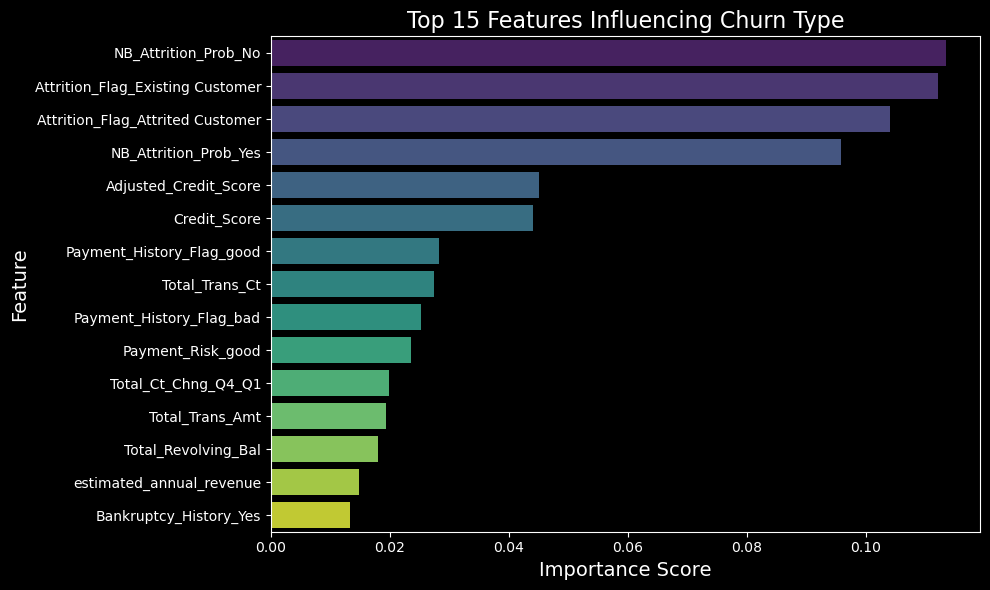

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# ==== 1. Prepare Data ====
# Assume 'Churn_Type' is the target column
X = df.drop(columns=['Churn_Type'])
y = df['Churn_Type']

# Separate numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# ==== 2. Preprocessor ====
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# ==== 3. Model ====
rf = RandomForestClassifier(random_state=42)

clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', rf)
])

# ==== 4. Train-Test Split & Fit ====
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf.fit(X_train, y_train)

# ==== 5. Get Feature Importances ====
# Get feature names after preprocessing
ohe = clf.named_steps['preprocessor'].named_transformers_['cat']
cat_feature_names = ohe.get_feature_names_out(categorical_features)
all_feature_names = numeric_features + list(cat_feature_names)

importances = clf.named_steps['model'].feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(15)

# ==== 6. Plot 
plt.style.use('dark_background')

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Top 15 Features Influencing Churn Type', fontsize=16)
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.tight_layout()
plt.show()
